In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

In [13]:
def fft_iterative(f, λ):
    N = len(f)
    F = bit_reverse_permute(f)
    θ = 2 * cmath.pi * λ / N
    w = [cmath.exp(i * θ) for i in range(N // 2)]
    
    currN = 2
    while currN <= N:
        half_currN = currN // 2
        table_step = N // currN
        for i in range(0, N, currN):
            k = 0
            for j in range(i, i + half_currN):
                temp = w[k] * F[j + half_currN]
                F[j + half_currN] = F[j] - temp
                F[j] += temp
                k += table_step
        currN *= 2
    
    return F

def bit_reverse_permute(f):
    N = len(f)
    bit_rev_permuted = [0] * N
    bit_length = len(bin(N - 1)[2:])
    for i in range(N):
        bit_rev_permuted[int('{:0{width}b}'.format(i, width=bit_length)[::-1], 2)] = f[i]
    return bit_rev_permuted


In [24]:
# Example usage:
f = [1, 2, 3, 4]
λ = 1
result = fft_iterative(f, λ)
print(result)

[(10+0j), (-11.620954761930703+0j), (-2+0j), (7.620954761930703+0j)]


In [25]:
import numpy as np

def realfft(f):
    N = len(f)
    h = np.zeros(N//2, dtype=complex)
    
    for j in range(N//2):
        h[j] = f[2*j] + 1j*f[2*j + 1]
        
    H = np.fft.fft(h)
    H = np.concatenate((H, np.conj(H[::-1])))
    
    theta = -2*np.pi*1j/N
    F = np.zeros(N, dtype=complex)
    
    for n in range(N//2 + 1):
        F[n] = 0.5*(H[n] + np.exp(theta*n)*H[(N//2)-n]) - 0.5j*np.exp(theta*n)*(H[n] - np.exp(theta*((N//2)-n))*H[(N//2)-n])
        
    F = np.concatenate((F[:N//2+1], np.conj(F[N//2-1:0:-1])))
    
    return F

# Example usage:
fs = 10000  # Sampling frequency (Hz)
T = 1/fs    # Sampling period (s)
N = 1024    # Number of samples
t = np.arange(N) * T  # Time vector

# Generate a 10000 Hz sine wave
f_signal = 10000  # Frequency of the signal (Hz)
signal = np.sin(2 * np.pi * f_signal * t)

# Compute real FFT
fft_result = realfft(signal)

# Print the first few elements of the FFT result
print(fft_result[:10])


[ 7.00951250e-11-1.52765551e-12j  8.91477299e-13+8.39593118e-13j
  8.77591031e-13+7.43847264e-13j  9.56465011e-13-3.26213689e-12j
  9.69009088e-13-1.29254467e-12j  1.86540397e-12-4.52906365e-12j
  3.29888603e-12-4.29568714e-12j -7.74542339e-13-9.29024807e-13j
 -4.67554528e-12-6.03046207e-12j -3.53941623e-13+5.65289584e-13j]


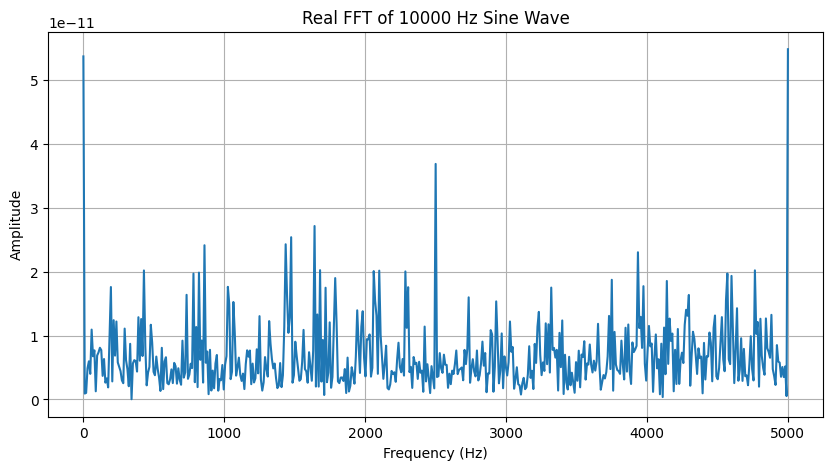

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def fft(x):
    N = len(x)
    if N <= 1:
        return x
    even = fft(x[0:N//2])
    odd = fft(x[N//2:])
    even_length = len(even)
    odd_length = len(odd)
    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(min(even_length, odd_length))]
    even = even[:len(T)]  # Ensure even has the same length as T
    return [even[k] + T[k] for k in range(len(T))] + [even[k] - T[k] for k in range(len(T))]

def realfft(f):
    N = len(f)
    h = np.zeros(N//2, dtype=complex)
    
    for j in range(N//2):
        h[j] = f[2*j] + 1j*f[2*j + 1]
        
    H = fft(h)
    H = np.concatenate((H, np.conj(H[::-1])))
    
    theta = -2*np.pi*1j/N
    F = np.zeros(N, dtype=complex)
    
    for n in range(N//2 + 1):
        F[n] = 0.5*(H[n] + np.exp(theta*n)*H[(N//2)-n]) - 0.5j*np.exp(theta*n)*(H[n] - np.exp(theta*((N//2)-n))*H[(N//2)-n])
        
    F = np.concatenate((F[:N//2+1], np.conj(F[N//2-1:0:-1])))
    
    return F

# Parameters
fs = 10000   # Sampling frequency (Hz)
T = 1/fs     # Sampling period (s)
N = 1024     # Number of samples
t = np.arange(N) * T  # Time vector

# Generate a 10000 Hz sine wave
f_signal = 10000  # Frequency of the signal (Hz)
signal = np.sin(2 * np.pi * f_signal * t)

# Compute real FFT
fft_result = realfft(signal)

# Frequency axis
freqs = np.arange(N//2 + 1) * fs / N

# Plot
plt.figure(figsize=(10, 5))
plt.plot(freqs, np.abs(fft_result)[:N//2 + 1])
plt.title('Real FFT of 10000 Hz Sine Wave')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


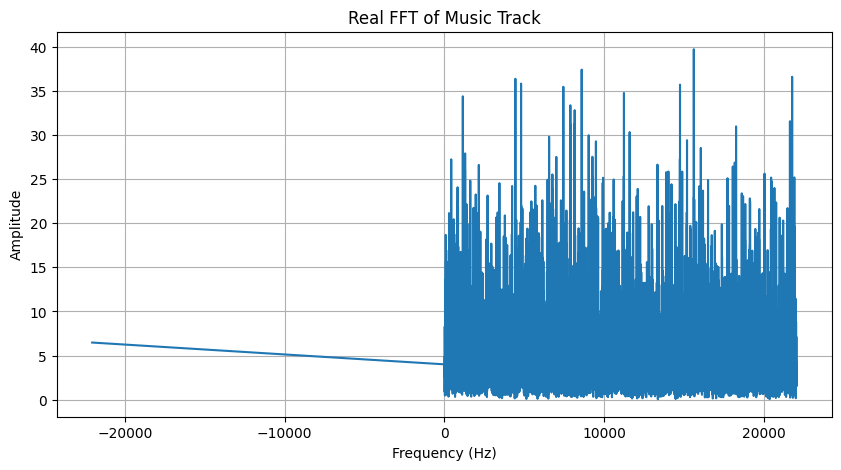

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

# Load the music track
audio_file = 'ouch.wav'
y, sr = librosa.load(audio_file, sr=None)

# Apply real FFT to the audio signal
fft_result = realfft(y)

# Frequency axis
freqs = np.fft.fftfreq(len(y), 1/sr)[:len(y)//2 + 1]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(freqs, np.abs(fft_result)[:len(y)//2 + 1])
plt.title('Real FFT of Music Track')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


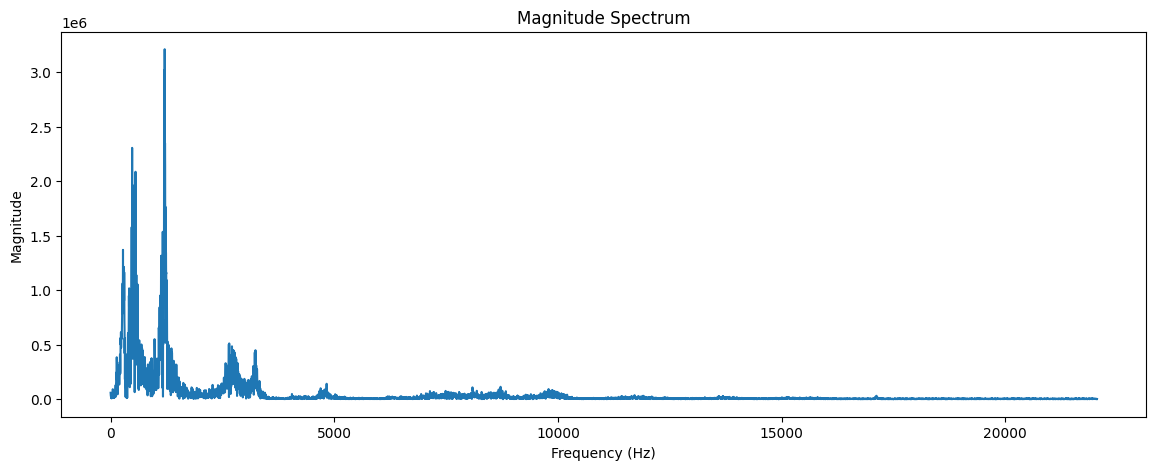

In [6]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

# Assuming the provided FFT function is defined elsewhere in your code as FFT(P)
def FFT(P):
    # P - [p0, p1, ..., pn-1] coeff representation
    n = len(P)  # n is a power of 2
    if n == 1:
        return P

    # Corrected ω to use np.exp and np.pi
    ω = np.exp((2 * np.pi * 1j) / n)

    Pe = P[0:n:2]
    Po = P[1:n:2]
    ye = FFT(Pe)
    yo = FFT(Po)

    y = [0] * n
    for j in range(n // 2):
        y[j] = ye[j] + (ω**j) * yo[j]
        y[j + n // 2] = ye[j] - (ω**j) * yo[j]

    return y
# Step 1: Read the WAV file
fs, data = wavfile.read('ouch.wav')  # 'fs' is the sampling rate, 'data' is the audio data

# Step 2: Pre-process the Data
if len(data.shape) > 1:
    data = data[:,0]


n = len(data)
n_fft = 2**(n-1).bit_length()  # Finds the next power of two
data_fft = np.zeros(n_fft, dtype=complex)
data_fft[:n] = data  # Zero-padding if necessary

# Step 3: Apply the FFT
fft_result = FFT(data_fft)

# Step 4: Analyze/Use the Result

magnitude_spectrum = np.abs(fft_result)
frequencies = np.fft.fftfreq(n_fft, 1/fs)

# Plot the magnitude spectrum
plt.figure(figsize=(14, 5))
plt.plot(frequencies[:n_fft // 2], magnitude_spectrum[:n_fft // 2]) 
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')
plt.show()